# Network Graphs 
- Network graphs are used to visualize the connections between items in our dataset

### Installation
- **networkx**
    - pip install `networkx`
    - conda install -c conda-forge `networkx`
- **nxviz**
    - pip install `nxviz`
    - conda install -c conda-forge `nxviz` 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Undirected Graphs 

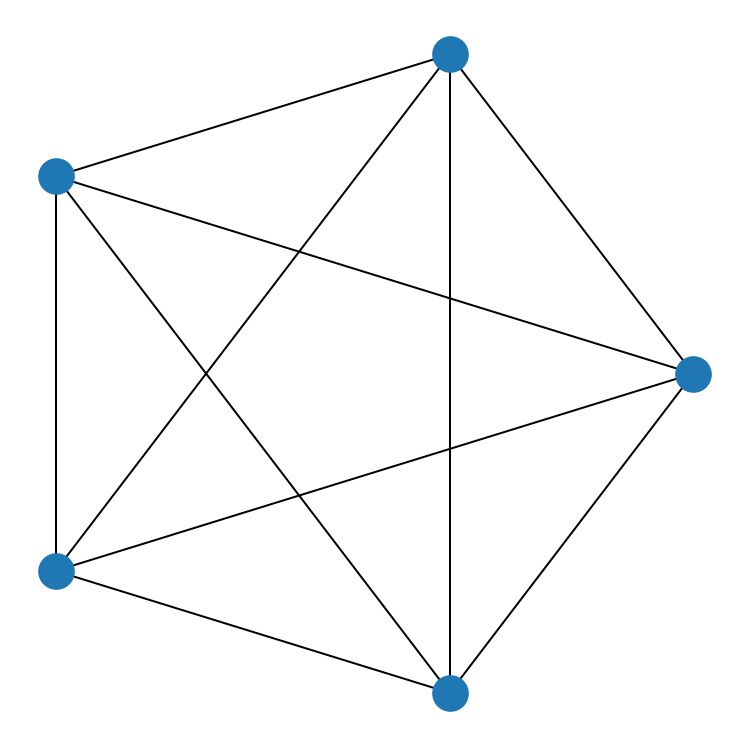

In [2]:
G = nx.complete_graph(5)
plt.figure(figsize=(5,5))
nx.draw_circular(G)

Edges are the connection between two points

In [3]:
# we can see all the edges in G
list(G.edges())

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

### Adjacency matrix

In [4]:
G.nodes()

NodeView((0, 1, 2, 3, 4))

In [5]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1],
        [1, 1, 1, 1, 0]], dtype=int32)

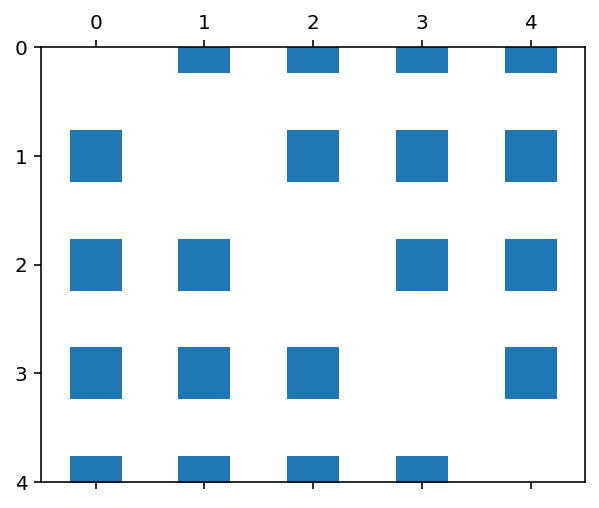

In [6]:
# Graphical view of connections
plt.spy(nx.adjacency_matrix(G).todense(), markersize=25)
plt.xticks(ticks=range(len(G.nodes())), labels=[str(x) for x in G.nodes()])
plt.yticks(ticks=range(len(G.nodes())), labels=[str(x) for x in G.nodes()])

plt.show();

### Types of graphs 
- Non-directed graphs
- Directed Graphs
- Bipartite Graphs
    - Graphs consiting of two groups of nodes. There are link between these two groups . But no link among the same groups.

https://www.geeksforgeeks.org/directed-graphs-multigraphs-and-visualization-in-networkx/

https://plotly.com/python/network-graphs/

Reference to use in this class: 
https://www.datacamp.com/community/tutorials/social-network-analysis-python 


In [19]:
import networkx as nx


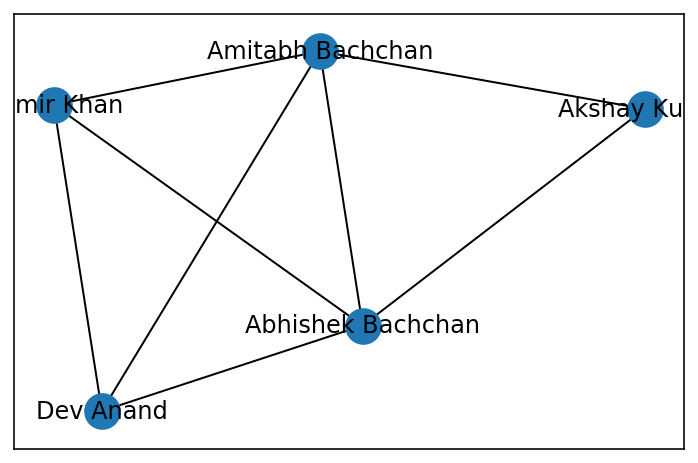

In [28]:
# Symmetric Networks
# Defining the connections
G_symmetric = nx.Graph()  # no arrows
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

# Display networks
nx.draw_networkx(G_symmetric)


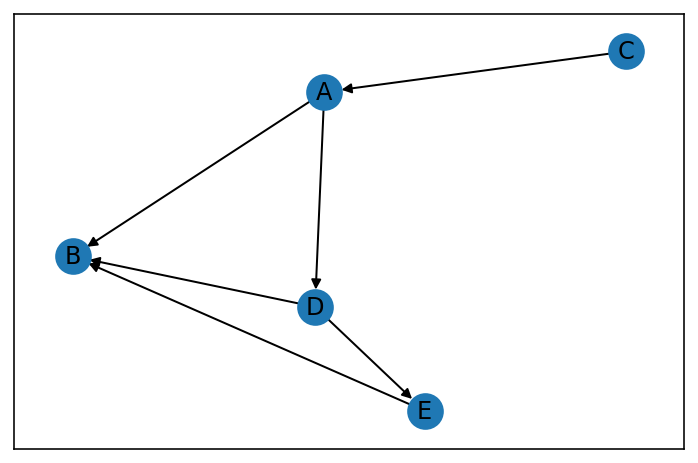

In [29]:
# Asymmetric Networks
# Assigning the connection
G_asymmetric = nx.DiGraph()  # have arrow
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')
G_asymmetric.add_edge('D','B')
G_asymmetric.add_edge('E','B')

# Displaying the connections
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)


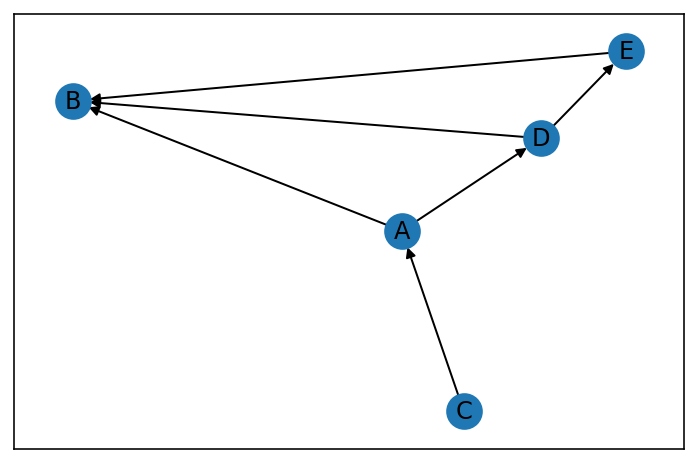

In [30]:
nx.draw_networkx(G_asymmetric)

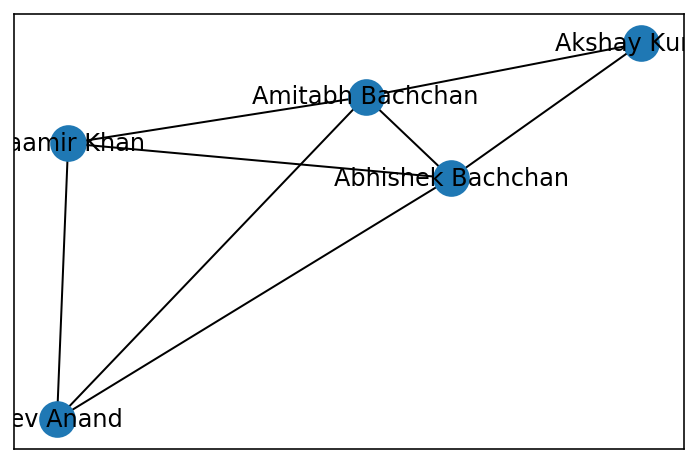

In [32]:
# Weighted Networks
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)

plt.figure()
nx.spring_layout(G_weighted)
nx.draw_networkx(G_weighted)

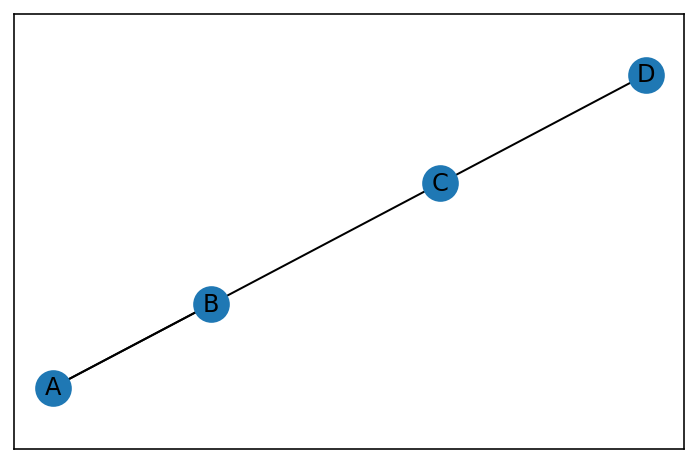

In [41]:
# Multigraph
G = nx.MultiGraph()
G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C',relation='friend')

nx.spring_layout(G)
nx.draw_networkx(G)

In [42]:
G.edges(data=True)  # show relationship

MultiEdgeDataView([('A', 'B', {'relation': 'neighbor'}), ('A', 'B', {'relation': 'friend'}), ('B', 'C', {'relation': 'neighbor'}), ('C', 'D', {'relation': 'friend'})])

In [47]:
# Degree
print(nx.degree(G, 'A'))
print(nx.degree(G_symmetric, 'Dev Anand'))

2
3


In [49]:
nx.clustering(G_asymmetric)

{'A': 0.16666666666666666,
 'B': 0.3333333333333333,
 'D': 0.3333333333333333,
 'C': 0,
 'E': 0.5}

In [51]:
#Distance
nx.shortest_path(G_symmetric, 'Dev Anand', 'Akshay Kumar')  # for dev to go to akshay, need to pass through amithabh bachan

['Dev Anand', 'Amitabh Bachchan', 'Akshay Kumar']

In [53]:
# connection of 1 node to another (bfs_tree)
T = nx.bfs_tree(G_symmetric, 'Dev Anand')

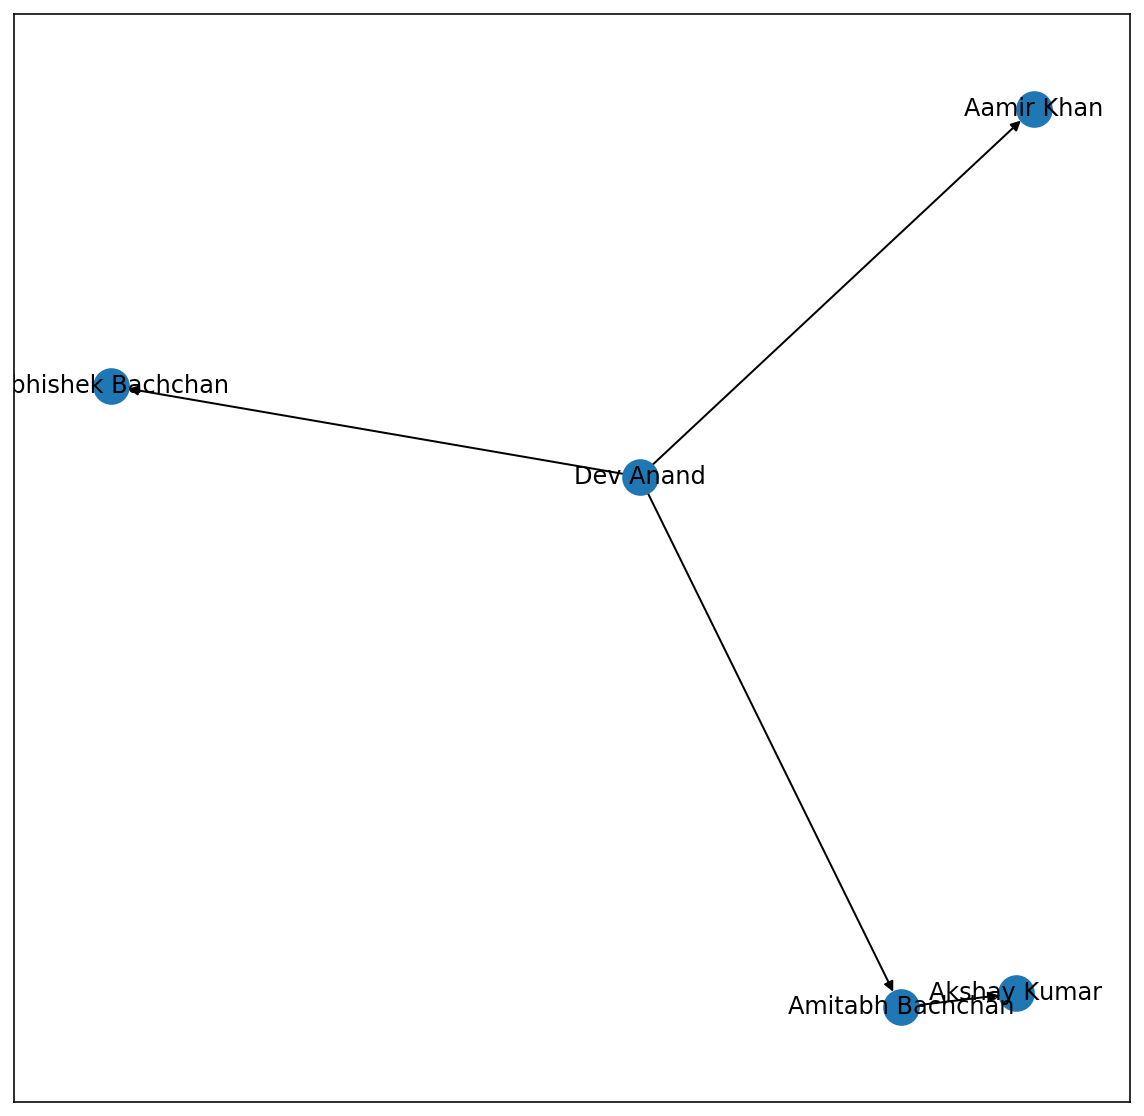

In [56]:
plt.figure(figsize=(10,10))
nx.spring_layout(T)
nx.draw_networkx(T)

In [59]:
# step taken
nx.eccentricity(G_symmetric)

{'Amitabh Bachchan': 1,
 'Abhishek Bachchan': 1,
 'Aamir Khan': 2,
 'Akshay Kumar': 2,
 'Dev Anand': 2}

In [62]:
# degree of popularity (how many node connected to other)
nx.degree_centrality(G_symmetric)

{'Amitabh Bachchan': 1.0,
 'Abhishek Bachchan': 1.0,
 'Aamir Khan': 0.75,
 'Akshay Kumar': 0.5,
 'Dev Anand': 0.75}

In [63]:
# using fb data

In [64]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

(-1.075748043955056,
 0.5687754926092308,
 -0.9009729914818291,
 0.7333238415871147)

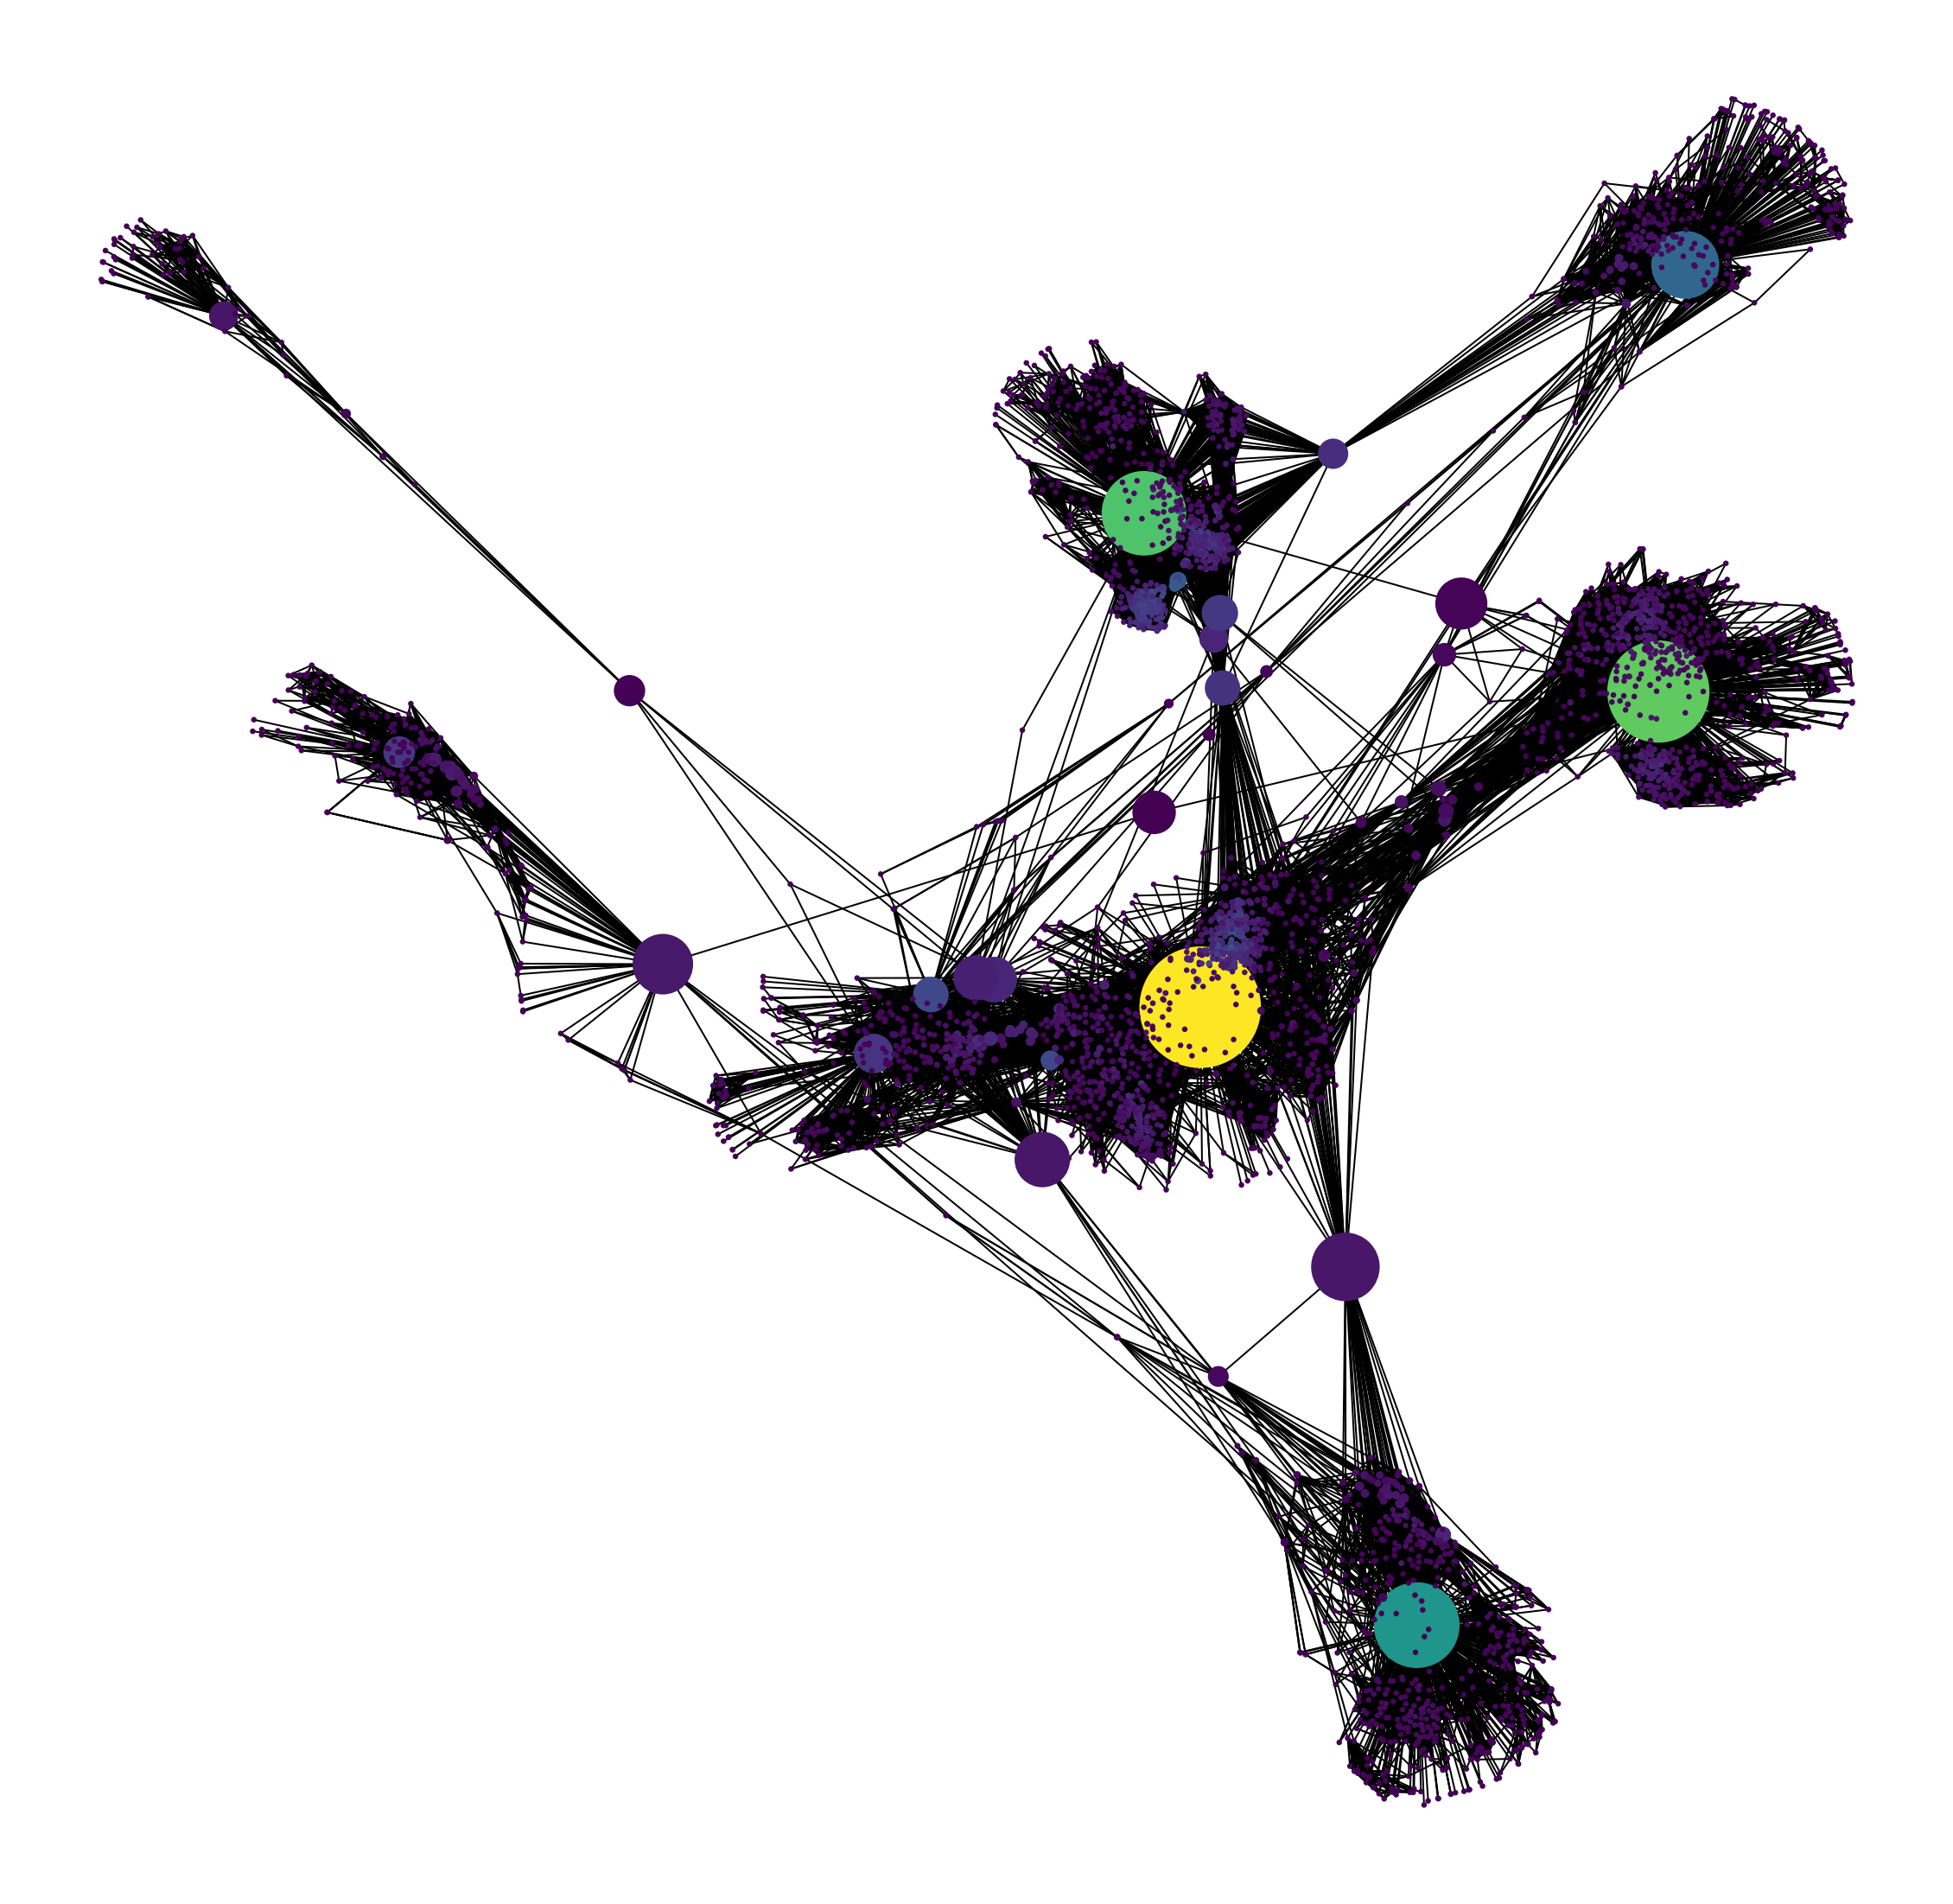

In [66]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]

plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

## Exercise 1
- Pick **3** companies and create a network graph of the major investors and the comapnies 

In [155]:
# picking share holders data for inari, uwc, greatec, frontkn, gtronic

In [156]:
# read csv file
sh = pd.read_csv("shareholders.csv")

In [157]:
sh

,Stocks,Shareholder,Value (M)
0,UWC,UWC Capital Sdn. Bhd.,1810.29
1,UWC,Ng Chai Eng,312.10
2,UWC,Lau Chee Kheong,312.10
3,UWC,AIA BHD.,121.66
4,UWC,Citibank New York,90.75
...,...,...,...
96,FRONTKN,Beneficial Owner,25.92
97,FRONTKN,Stichting Depositary APG Emerging Markets Equi...,25.05
98,FRONTKN,Kenanga Syariah Growth Fund,22.74
99,FRONTKN,Ng Wai Pin,22.25


In [158]:
# G_ntwrk = nx.read_edgelist(ntwrk, create_using = nx.Graph(), nodetype=int)
G_ntwrk = nx.from_pandas_edgelist(sh[["Stocks", "Shareholder"]], source='Shareholder', target='Stocks')

In [159]:
print(nx.info(G_ntwrk))

Name: 
Type: Graph
Number of nodes: 95
Number of edges: 101
Average degree:   2.1263


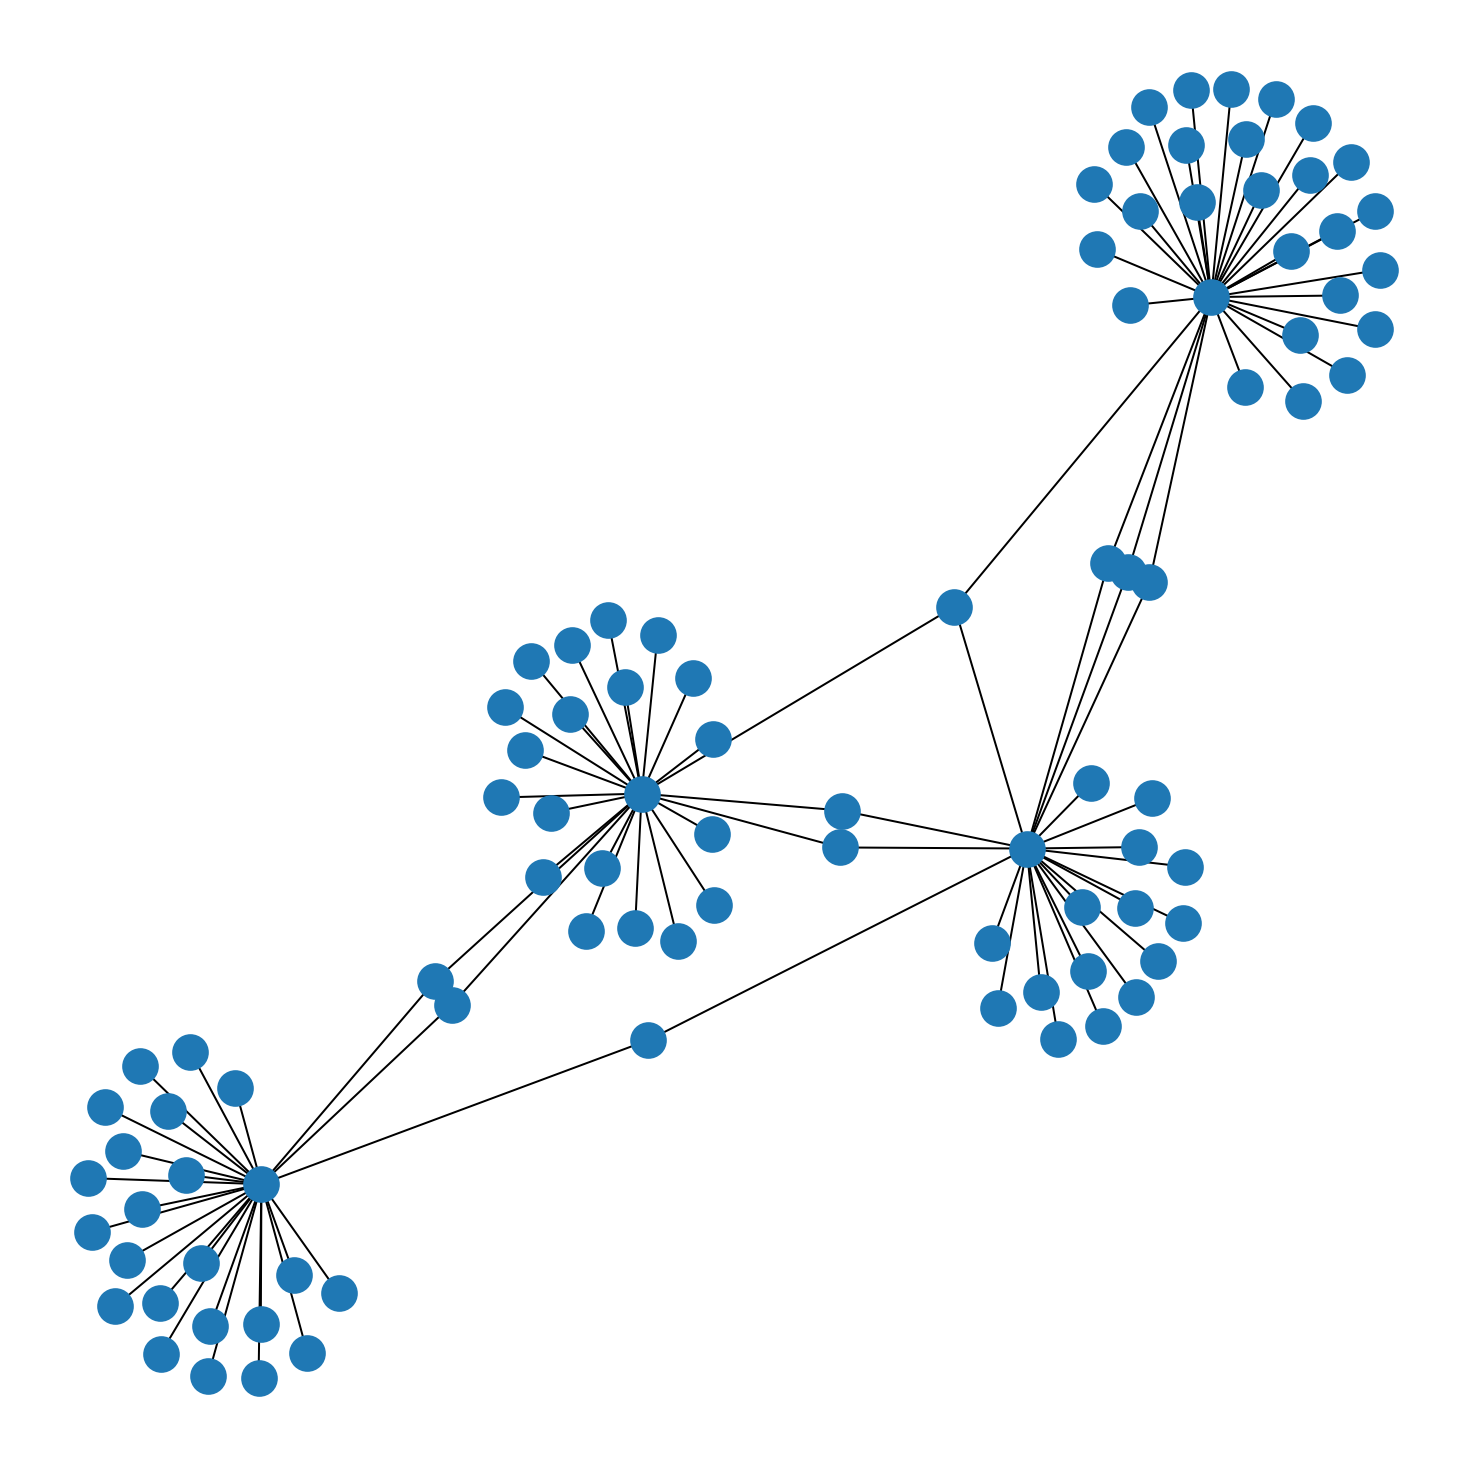

In [160]:
plt.figure(figsize = (10,10))
nx.draw(G_ntwrk)

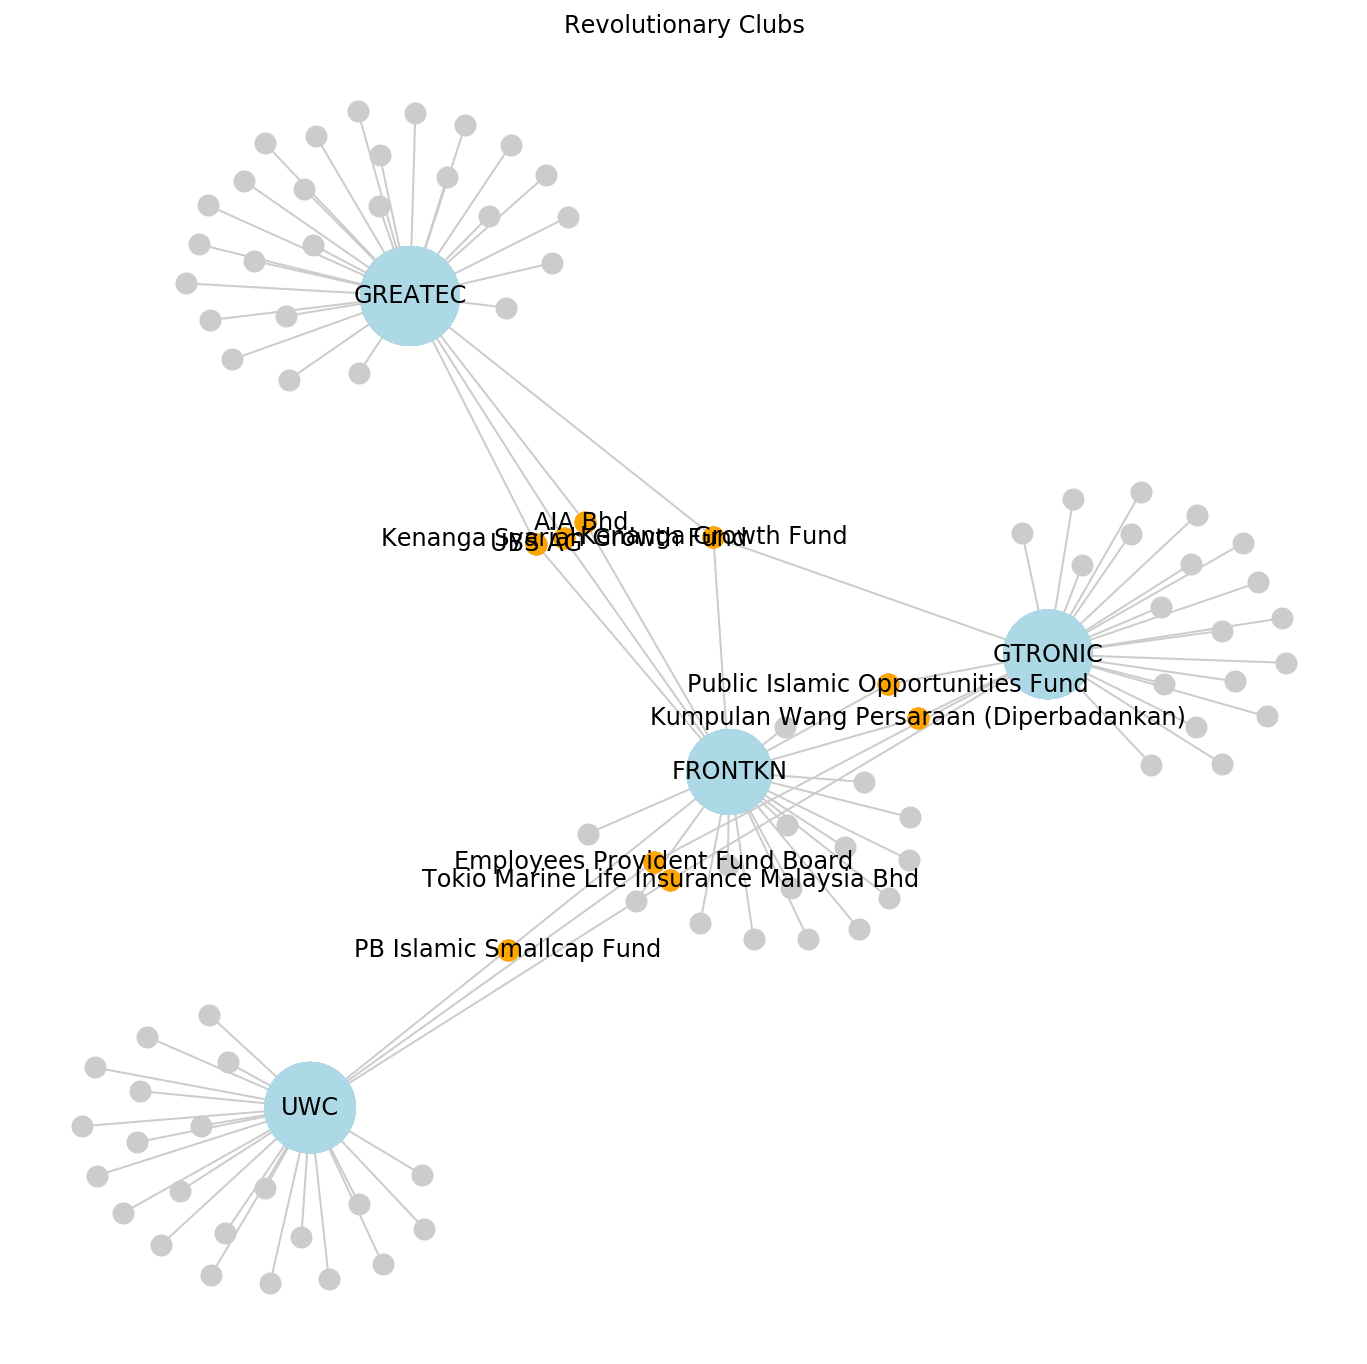

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(sh[["Stocks", "Shareholder"]], source='Shareholder', target='Stocks') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
# Edges thin and grey
# Share holder small and grey
# Stocks sized according to their number of connections
# Stocks blue
# Labels for Stocks ONLY
# Share holder who are highly connected are a highlighted color

# Go through every Stocks names, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size
stock_size = [g.degree(stock) * 80 for stock in sh['Stocks']]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=sh['Stocks'], 
                       node_size=stock_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw all Shareholders
nx.draw_networkx_nodes(g, layout, nodelist=sh['Shareholder'], node_color='#cccccc', node_size=100)

# Draw Related Shareholders
major_sh = [sh for sh in sh['Shareholder'] if g.degree(sh) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=major_sh, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

# labeling the stocks nodes
node_labels = dict(zip(sh['Stocks'], sh['Stocks']))
# labeling the major shareholders nodes
major_shl = dict(zip(major_sh, major_sh))
# combining both labels
labels = {**node_labels , **major_shl}

# drawing the whole networks
nx.draw_networkx_labels(g, layout, labels=labels)

# 4. Turn off the axis
plt.axis('off')

plt.title("Revolutionary Clubs")

# 5. Tell matplotlib to show it
plt.show()

In [172]:
node_labels

{'UWC': 'UWC',
 'GREATEC': 'GREATEC',
 'GTRONIC': 'GTRONIC',
 'FRONTKN': 'FRONTKN'}

In [178]:
dict(zip(sh['Stocks'], sh['Stocks']))

{'UWC': 'UWC',
 'GREATEC': 'GREATEC',
 'GTRONIC': 'GTRONIC',
 'FRONTKN': 'FRONTKN'}

In [180]:
major_shl = dict(zip(major_sh, major_sh))

In [181]:
major_shl

{'PB Islamic Smallcap Fund': 'PB Islamic Smallcap Fund',
 'Employees Provident Fund Board': 'Employees Provident Fund Board',
 'Tokio Marine Life Insurance Malaysia Bhd': 'Tokio Marine Life Insurance Malaysia Bhd',
 'Kenanga Growth Fund': 'Kenanga Growth Fund',
 'AIA Bhd.': 'AIA Bhd.',
 'Kenanga Syariah Growth Fund': 'Kenanga Syariah Growth Fund',
 'UBS AG': 'UBS AG',
 'Kumpulan Wang Persaraan (Diperbadankan)': 'Kumpulan Wang Persaraan (Diperbadankan)',
 'Public Islamic Opportunities Fund': 'Public Islamic Opportunities Fund'}

In [185]:
dict3 = {**node_labels , **major_shl}

In [186]:
dict3

{'UWC': 'UWC',
 'GREATEC': 'GREATEC',
 'GTRONIC': 'GTRONIC',
 'FRONTKN': 'FRONTKN',
 'PB Islamic Smallcap Fund': 'PB Islamic Smallcap Fund',
 'Employees Provident Fund Board': 'Employees Provident Fund Board',
 'Tokio Marine Life Insurance Malaysia Bhd': 'Tokio Marine Life Insurance Malaysia Bhd',
 'Kenanga Growth Fund': 'Kenanga Growth Fund',
 'AIA Bhd.': 'AIA Bhd.',
 'Kenanga Syariah Growth Fund': 'Kenanga Syariah Growth Fund',
 'UBS AG': 'UBS AG',
 'Kumpulan Wang Persaraan (Diperbadankan)': 'Kumpulan Wang Persaraan (Diperbadankan)',
 'Public Islamic Opportunities Fund': 'Public Islamic Opportunities Fund'}